# Limpieza Datos de los Clientes
#### JJD-Predictors

### Lectura y Adecuación de los datos.

Lectura de los datos como un DataFrame usando la libreria pandas. 

In [81]:
import pandas as pd
import numpy as np
%matplotlib inline

metadata_clients = pd.read_excel("Metadatos_Tabla.xlsx")
data_clients = pd.read_csv("dt_info_pagadores_muestra.csv", error_bad_lines = False, header=None)

Creación de un diccionario con el nombre de las columnas para asignar al DataFrame.  

In [82]:
dict_header = dict()
list_header = list(metadata_clients.name)
for i,element in enumerate(list_header):
    dict_header[i] = element
    
data_clients = data_clients.rename(columns = dict_header)

Creación de diccionarios para reemplazar los códigos de los clientes indicados con letras por su respectiva descripción (brindada por Bancolombia). En el caso de los ingresos, se tiene en cuenta que los datos corresponden a un rango dado, se decide asignar un valor numérico dentro de ese rango. 

In [83]:
dict_ocupacion = {"E": "EMPLEADO_SOCIO", "I":"DESEMPLEADO_CON_INGRESOS", "O":"OTRA", "P":"INDEPENDIENTE",
                 "S": "DESEMPLEADO_SIN_INGRESOS", "1": "EMPLEADO", "2":"ESTUDIANTE", "3": "INDEPENDIENTE", "4":"HOGAR",
                 "5": "JUBILADO", "6": "AGRICULTOR", "7":"GANADERO", "8":"COMERCIANTE", "9": "RENTISTA_DE_CAPITAL"}

dict_tipo_vivienda={'A':'ALQUILADA','R':'ALQUILADA','F':'FAMILIAR','I':'NO_INFORMA','P':'PROPIA','O':'PROPIA'}

dict_nivel_academico={'H':'BACHILLERATO','B':'BACHILLERATO','U':'UNIVERSITARIO','E':'ESPECIALIZACION',
                      'N':'NINGUNO','P':'PRIMARIA','S':'POSTGRADO','T':'TECNICO','I':'NO_INFORMA'}
                      
dict_estado_civil = {"S": "SOLTERO", "M": "CASADO", "F":"DESCONOCIDO", "I": "NO_INFORMA", "D": "DIVORCIADO", 
                     "W": "VIUDO", "O": "OTRO" }

dict_ingreso_rango = {"a. (0  1.1MM]": 1, "b. (1.1  2.2MM]": 1.5,  "c. (2.2  3.3MM]": 2.5,"d. (3.3  4.4MM]": 3.5,
                      "e. (4.4  5.5MM]": 5, "f. (5.5  6.6MM]": 6, "g. (6.6  7.6MM]": 7, "h. (7.6  8.7MM]": 8, 
                      "i. (8.7  Inf)": 9}
dict_ingreso_edad = {'\\N': 0}

Asignación de los diccionarios respectivos para cada columna y mapeo de los valores del diccionario. 

In [84]:
data_clients["ocupacion"] = data_clients["ocupacion"].map(dict_ocupacion)
data_clients["tipo_vivienda"] = data_clients["tipo_vivienda"].map(dict_tipo_vivienda)
data_clients["nivel_academico"] = data_clients["nivel_academico"].map(dict_nivel_academico)
data_clients["estado_civil"] = data_clients["estado_civil"].map(dict_estado_civil)
data_clients["ingreso_rango"] = data_clients["ingreso_rango"].map(dict_ingreso_rango)
data_clients["edad"] = data_clients["edad"].replace(dict_ingreso_edad)

### Comprensión de los datos.

Se describe el dataset con la función *describe* de pandas, para obtener un análisis estadístico de los datos por columna (aplica para los valores numéricos) y un conteo de acuerdo a la frecuencia y valores únicos para todos los datos. 

In [85]:
data_clients.describe(include='all')

,id_cliente,seg_str,ocupacion,tipo_vivienda,nivel_academico,estado_civil,genero,edad,ingreso_rango
count,338606.000000,338606,331769,166386,294313,332006,332897,338606,331222.000000
unique,NaN,5,13,4,8,7,2,109,NaN
top,NaN,PERSONAL,EMPLEADO,FAMILIAR,UNIVERSITARIO,SOLTERO,F,29,NaN
freq,NaN,233568,210488,83736,135754,175878,169336,14001,NaN
mean,169303.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.433593
std,97747.276962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.669391
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,84652.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000
50%,169303.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000
75%,253954.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


Se determina el promedio de datos nulos por columna en el conjunto de datos.

In [86]:
100*data_clients.isnull().mean()

id_cliente          0.000000
seg_str             0.000000
ocupacion           2.019161
tipo_vivienda      50.861473
nivel_academico    13.080985
estado_civil        1.949168
genero              1.686030
edad                0.000000
ingreso_rango       2.180706
dtype: float64

Se realizan histogramas para cada una de las columnas para ver el número de clientes por categoría y aquellos datos no disponibles.

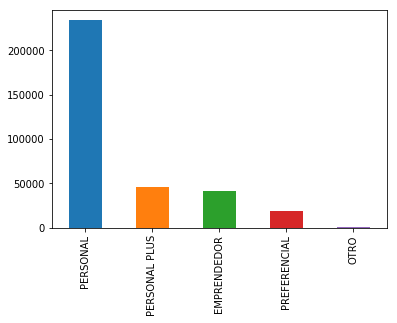

In [87]:
data_clients["seg_str"].replace({None:"NaN"}).value_counts().plot(kind='bar')

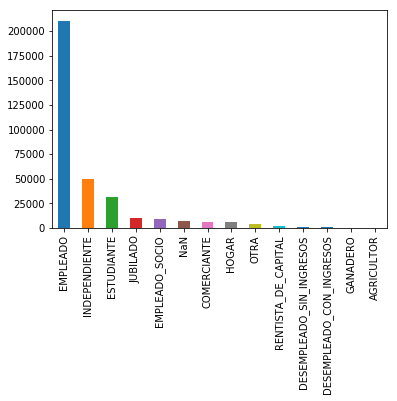

In [88]:
data_clients["ocupacion"].replace({None:"NaN"}).value_counts().plot(kind='bar')

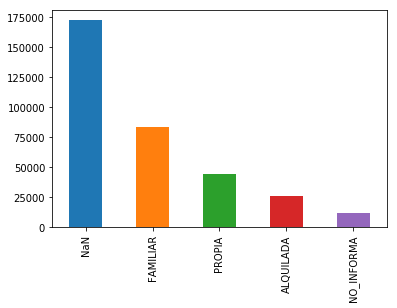

In [89]:
data_clients["tipo_vivienda"].replace({None:"NaN"}).value_counts().plot(kind='bar')

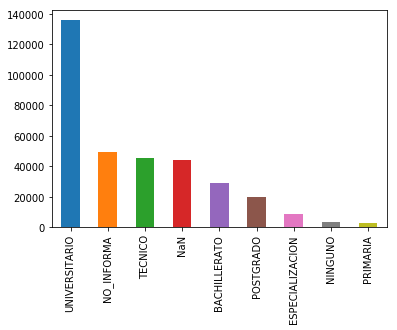

In [90]:
data_clients["nivel_academico"].replace({None:"NaN"}).value_counts().plot(kind='bar')

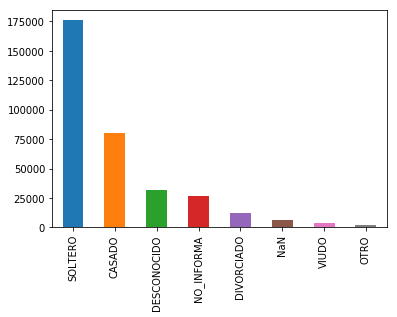

In [91]:
data_clients["estado_civil"].replace({None:"NaN"}).value_counts().plot(kind='bar')

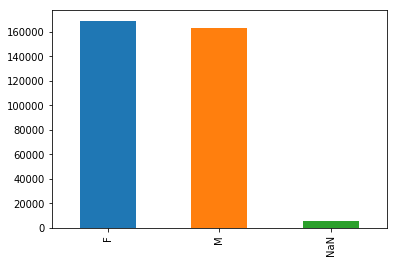

In [92]:
data_clients["genero"].replace({None:"NaN"}).value_counts().plot(kind='bar')

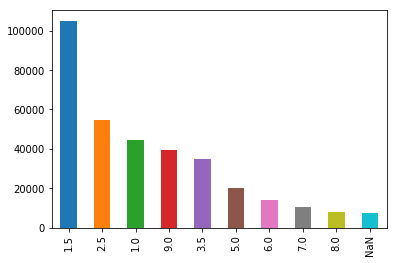

In [93]:
data_clients["ingreso_rango"].replace({None:"NaN"}).value_counts().plot(kind='bar')

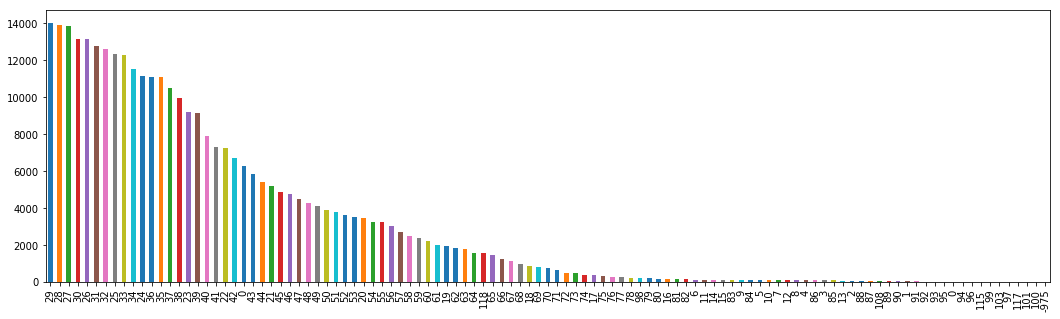

In [94]:
data_clients["edad"].replace({None:"NaN"}).value_counts(sort=True).plot(kind='bar',figsize = (18,5),stacked=True,sort_columns=True,xlim=[0,150])

Para los datos de la edad se hizo un filtro para eliminar aquellas personas con edad menor a 10 y mayor a 100, convirtiendo los valores a datos nulos. 

In [95]:
data_clients["edad"] = data_clients["edad"].astype('int')
data_clients["edad"] = data_clients["edad"].apply(lambda x: np.nan if x <= 10 else x)
data_clients["edad"] = data_clients["edad"].apply(lambda x: np.nan if x >= 100 else x)

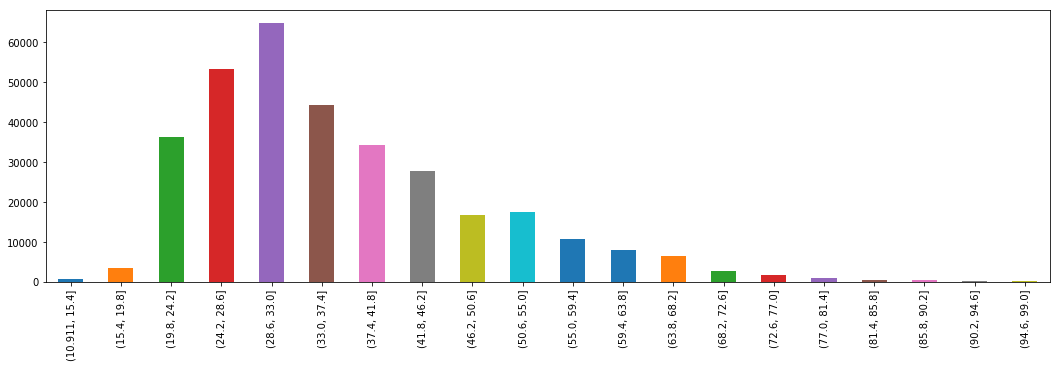

In [96]:
data_clients["edad"].dropna().value_counts(bins=20,sort=False).plot(kind='bar',figsize = (18,5))

Las columnas en las cuales el porcentaje de valores nulos supera el 50%, se eliminaron del conjunto de datos.

In [17]:
data_clients = data_clients.loc[:, data_clients.isnull().mean() < .5]

A continuación se muestran las columnas que quedan para el análisis posterior y el conteo de datos no nulos por cada una. 

In [18]:
100*data_clients.isnull().mean()

id_cliente          0.000000
seg_str             0.000000
ocupacion           2.019161
nivel_academico    13.080985
estado_civil        1.949168
genero              1.686030
edad                2.591803
ingreso_rango       2.180706
dtype: float64

In [19]:
data_clients.count()

id_cliente         338606
seg_str            338606
ocupacion          331769
nivel_academico    294313
estado_civil       332006
genero             332897
edad               329830
ingreso_rango      331222
dtype: int64

Se eliminan las columnas con más de seis valores nulos en una fila y se vuelve a hacer el conteo de datos disponibles.

In [99]:
data_clients = data_clients.dropna(thresh=6)

In [100]:
data_clients.count()

id_cliente         332394
seg_str            332394
ocupacion          331555
tipo_vivienda      166386
nivel_academico    294311
estado_civil       331039
genero             332388
edad               329539
ingreso_rango      325872
dtype: int64

Se agrupan los datos por nivel académico y se observa el ingreso promedio por cada grupo. Se observa que aquellos con nivel académico mayor son los que tienen un ingreso mayor. 

In [101]:
data_clients.groupby("nivel_academico")["ingreso_rango"].mean()

nivel_academico
BACHILLERATO       2.801065
ESPECIALIZACION    5.296444
NINGUNO            2.683619
NO_INFORMA         2.497246
POSTGRADO          5.806143
PRIMARIA           2.842115
TECNICO            2.572288
UNIVERSITARIO      3.950957
Name: ingreso_rango, dtype: float64

Se eliminan los datos que no contienen información de rango, género y edad.

In [102]:
data_clients = data_clients[~data_clients['ingreso_rango'].isnull()]
data_clients = data_clients[~data_clients['edad'].isnull()]
data_clients = data_clients[~data_clients['genero'].isnull()]

In [103]:
100*data_clients.isnull().mean()

id_cliente          0.000000
seg_str             0.000000
ocupacion           0.259054
tipo_vivienda      49.254872
nivel_academico    11.130954
estado_civil        0.419376
genero              0.000000
edad                0.000000
ingreso_rango       0.000000
dtype: float64

Se guardan los datos limpios en un archivo pkl y csv para leerlos en los otros notebook. 

In [26]:
data_clients.to_pickle("./data_clients.pkl")
data_clients.to_csv("./data_clients.csv")